# RAMP on predicting cyclist traffic in Paris


## Introduction

The dataset was collected with cyclist counters installed by Paris city council in multiple locations. It contains hourly information about cyclist traffic, as well as the following features,
 - counter name
 - counter site name
 - date
 - counter installation date
 - latitude and longitude
 
Available features are quite scarce. However, **we can also use any external data that can help us to predict the target variable.** 

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Loading the data with pandas

First, download the data files from Kaggle, and put them to into the data folder.


Data is stored in [Parquet format](https://parquet.apache.org/), an efficient columnar data format. We can load the train set with pandas,

In [3]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [ ]:
# added code
df = pd.read_csv('comptage-velo-donnees-compteurs.csv', sep=';')

df.drop(columns=['ID Photos','Lien vers photo du site de comptage','test_lien_vers_photos_du_site_de_comptage_','id_photo_1', 'url_sites','type_dimage','mois_annee_comptage'], inplace=True)

df = df.rename(columns={
    'Identifiant du compteur': 'counter_id',
    'Nom du compteur': 'counter_name',
    'Identifiant du site de comptage': 'site_id',
    'Nom du site de comptage': 'site_name',
    'Comptage horaire': 'bike_count',
    'Date et heure de comptage': 'date',
    'Date d\'installation du site de comptage': 'counter_installation_date',
    'Coordonnées géographiques': 'coordinates',
    'Identifiant technique compteur': 'counter_technical_id'
})

df['latitude'] = df['coordinates'].str.split(',').str[0]
df['longitude'] = df['coordinates'].str.split(',').str[1]
df['log_bike_count'] = np.log(df['bike_count'])

df[['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']] = df[['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']].astype('category')
#df['site_id'] = df['site_id'].astype('int64')
#df['date'] = pd.to_datetime(df['date'], )


df1 = df.copy()
df1['date'] = pd.to_datetime(df1['date'], utc=True)
df1['date'] = df1['date'].dt.tz_localize(None)
df1 = df1.sort_values(by='date', ascending=True)


site_ids = [
    100007049, 100036718, 100036719, 100042374, 100044493, 100047542, 100047545,
    100047546, 100047547, 100047548, 100049407, 100050876, 100056046, 100056047,
    100056223, 100056226, 100056327, 100056329, 100056330, 100056331, 100056332,
    100056334, 100056335, 100056336, 100057329, 100057380, 100057445, 100060178,
    100063175, 300014702
]
df1 = df1[df1['site_id'].isin(site_ids)]
df1

In [17]:
site_ids_list = data["site_id"].unique().tolist()
site_ids_list

[100007049,
 100036718,
 100036719,
 100042374,
 100044493,
 100047542,
 100047545,
 100047546,
 100047547,
 100047548,
 100049407,
 100050876,
 100056046,
 100056047,
 100056223,
 100056226,
 100056327,
 100056329,
 100056330,
 100056331,
 100056332,
 100056334,
 100056335,
 100056336,
 100057329,
 100057380,
 100057445,
 100060178,
 100063175,
 300014702]

In [12]:
data.columns

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count'],
      dtype='object')

In [4]:
#!pip install ydata_profiling
from  ydata_profiling import ProfileReport

In [5]:
#! pip install ipywidgets

In [6]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#! pip install openpyxl


In [ ]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.to_excel('output.xlsx', index=False)

We can check general information about different columns:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [ ]:
data.columns

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count'],
      dtype='object')

: 

and in particular the number of unique entries in each column,

In [ ]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

We have a 30 counting sites where sometimes multiple counters are installed per location.  Let's look at the most frequented stations:

In [ ]:
(
    data.groupby(["site_name", "counter_name"])["bike_count"].sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
)

/var/folders/5w/hyfqlrq101nd83437kh5nlm00000gn/T/ipykernel_32692/1192055722.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["site_name", "counter_name"])["bike_count"].sum()


,,bike_count
site_name,counter_name,
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol S-N,1992227.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli O-E,1551730.0
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol N-S,1497912.0
67 boulevard Voltaire SE-NO,67 boulevard Voltaire SE-NO,1130565.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli E-O,1015875.0
27 quai de la Tournelle,27 quai de la Tournelle SE-NO,984914.0
Quai d'Orsay,Quai d'Orsay E-O,948357.0
Totem Cours la Reine,Totem Cours la Reine O-E,894937.0
Face au 48 quai de la marne,Face au 48 quai de la marne SO-NE,884907.0


# Visualizing the data


Let's visualize the data, starting from the spatial distribution of counters on the map

In [6]:
import folium

m = folium.Map(location=data[["latitude", "longitude"]].mean(axis=0), zoom_start=13)

for _, row in (
    data[["counter_name", "latitude", "longitude"]]
    .drop_duplicates("counter_name")
    .iterrows()
):
    folium.Marker(
        row[["latitude", "longitude"]].values.tolist(), popup=row["counter_name"]
    ).add_to(m)

m

/Users/vincentmaladiere/mambaforge/envs/bike_counters/lib/python3.10/site-packages/folium/utilities.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords = (location[0], location[1])


Note that in this challenge, we consider only the 30 most frequented counting sites, to limit data size.

Next we will look into the temporal distribution of the most frequented bike counter. If we plot it directly we will not see much because there are half a million data points:

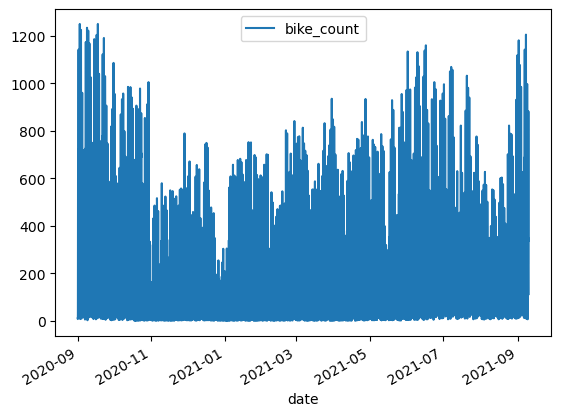

In [11]:
mask = data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"
data_sorted = data[mask].sort_values(by='date')
ax = data_sorted.plot(x="date", y="bike_count")
plt.show()

Instead we aggregate the data, for instance, by week to have a clearer overall picture:

C:\Users\emman\AppData\Local\Temp\ipykernel_60572\1979972553.py:4: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  pd.Grouper(freq="1w", key="date")


<Axes: xlabel='date'>

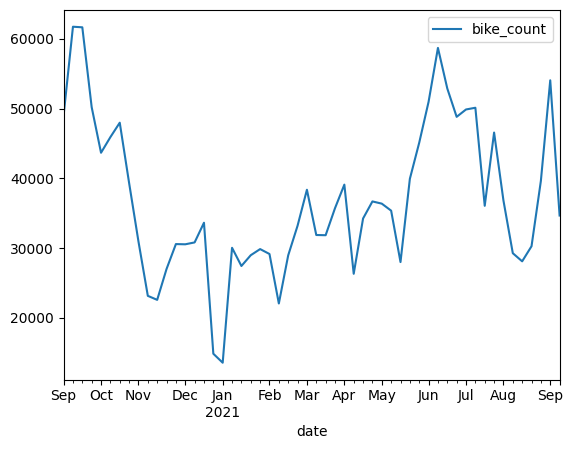

In [6]:
mask = (data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")

data[mask].groupby(
    pd.Grouper(freq="1w", key="date")
)[["bike_count"]].sum().plot()

While at the same time, we can zoom on a week in particular for a more short-term visualization,

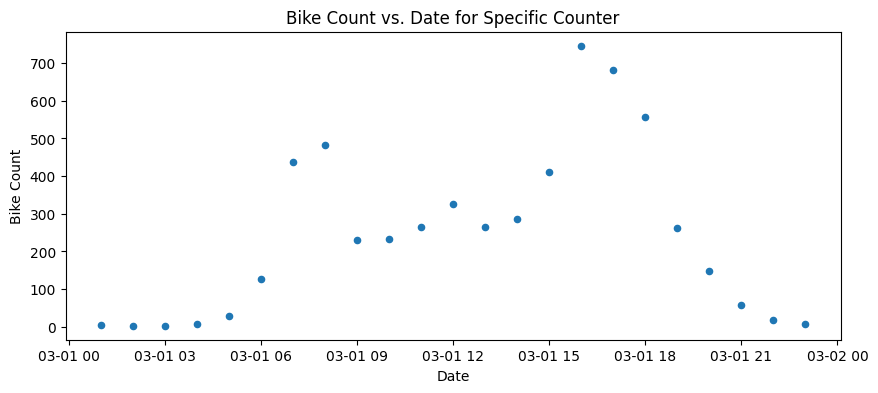

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))

mask = (
    (data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")
    & (data["date"] > pd.to_datetime("2021/03/01"))
    & (data["date"] < pd.to_datetime("2021/03/02"))
)

data[mask].plot.scatter(x="date", y="bike_count", ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Bike Count")
ax.set_title("Bike Count vs. Date for Specific Counter")

plt.show()

The hourly pattern has a clear variation between work days and weekends (7 and 8 March 2021).

If we look at the distribution of the target variable it skewed and non normal, 

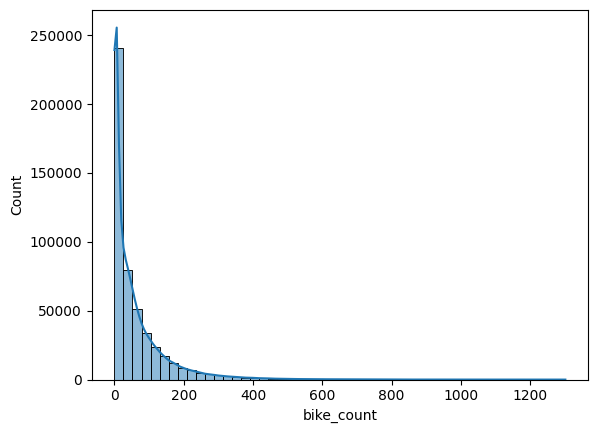

In [7]:
import seaborn as sns


ax = sns.histplot(data, x="bike_count", kde=True, bins=50)

Least square loss would not be appropriate to model it since it is designed for normal error distributions. One way to precede would be to transform the variable with a logarithmic transformation,
```py
data['log_bike_count'] = np.log(1 + data['bike_count'])
```

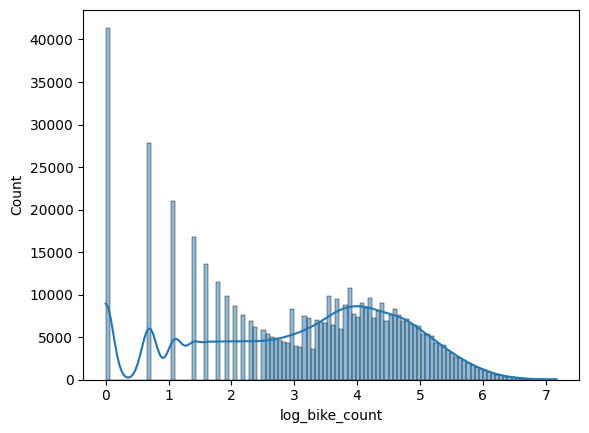

In [8]:
ax = sns.histplot(data, x="log_bike_count", kde=True)

which has a more pronounced central mode, but is still non symmetric. In the following, **we use `log_bike_count` as the target variable** as otherwise `bike_count` ranges over 3 orders of magnitude and least square loss would be dominated by the few large values. 

## Feature extraction

To account for the temporal aspects of the data, we cannot input the `date` field directly into the model. Instead we extract the features on different time-scales from the `date` field:

In [8]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X["year"] = X["date"].dt.year
    X["month"] = X["date"].dt.month
    X["day"] = X["date"].dt.day
    X["weekday"] = X["date"].dt.weekday
    X["hour"] = X["date"].dt.hour

    # Finally we can drop the original columns from the dataframe
    return X.drop(columns=["date"])

In [9]:
data["date"].head()

48321   2020-09-01 02:00:00
48324   2020-09-01 03:00:00
48327   2020-09-01 04:00:00
48330   2020-09-01 15:00:00
48333   2020-09-01 18:00:00
Name: date, dtype: datetime64[us]

In [10]:
_encode_dates(data[["date"]].head(5))

,year,month,day,weekday,hour
48321,2020,9,1,1,2
48324,2020,9,1,1,3
48327,2020,9,1,1,4
48330,2020,9,1,1,15
48333,2020,9,1,1,18


To use this function with scikit-learn estimators we wrap it with [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html):

In [11]:
from sklearn.preprocessing import FunctionTransformer

date_encoder = FunctionTransformer(_encode_dates, validate=False)
sample_encoded = date_encoder.fit_transform(data[["date"]]).head()
sample_encoded

,year,month,day,weekday,hour
48321,2020,9,1,1,2
48324,2020,9,1,1,3
48327,2020,9,1,1,4
48330,2020,9,1,1,15
48333,2020,9,1,1,18


Since it is unlikely that, for instance, that `hour` is linearly correlated with the target variable, we would need to additionally encode categorical features for linear models. This is classically done with [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), though other encoding strategies exist.

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)

enc.fit_transform(sample_encoded[["hour"]])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

**outliers**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def detect_outliers(df):
    """
    Comprehensive outlier detection across multiple methods.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    
    Returns:
    dict: A dictionary containing different outlier detection results
    """
    # Prepare results dictionary
    outlier_results = {}
    
    # Z-Score Method (Standard Deviation Approach)
    z_scores = np.abs(stats.zscore(df['bike_count']))
    z_score_outliers = df[z_scores > 3]
    outlier_results['z_score_outliers'] = z_score_outliers
    
    # Interquartile Range (IQR) Method
    Q1 = df['bike_count'].quantile(0.25)
    Q3 = df['bike_count'].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = df[
        (df['bike_count'] < (Q1 - 1.5 * IQR)) | 
        (df['bike_count'] > (Q3 + 1.5 * IQR))
    ]
    outlier_results['iqr_outliers'] = iqr_outliers
    
    # Percentile Method
    percentile_outliers = df[
        (df['bike_count'] < df['bike_count'].quantile(0.01)) | 
        (df['bike_count'] > df['bike_count'].quantile(0.99))
    ]
    outlier_results['percentile_outliers'] = percentile_outliers
    
    return outlier_results

def visualize_outliers(df, outlier_results):
    """
    Create visualizations to help understand outliers.
    
    Parameters:
    df (pandas.DataFrame): Original DataFrame
    outlier_results (dict): Dictionary of outlier detection results
    """
    # Set up the plotting
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Outlier Detection Visualizations', fontsize=16)
    
    # 1. Box Plot
    sns.boxplot(x=df['bike_count'], ax=axes[0, 0])
    axes[0, 0].set_title('Box Plot of Bike Counts')
    
    # 2. Violin Plot
    sns.violinplot(x=df['bike_count'], ax=axes[0, 1])
    axes[0, 1].set_title('Violin Plot of Bike Counts')
    
    # 3. Histogram with Outlier Overlay
    axes[1, 0].hist(df['bike_count'], bins=50, alpha=0.5, label='All Data')
    axes[1, 0].set_title('Histogram of Bike Counts with Outliers')
    
    # Overlay different outlier methods
    methods = ['z_score_outliers', 'iqr_outliers', 'percentile_outliers']
    colors = ['red', 'green', 'purple']
    
    for method, color in zip(methods, colors):
        outliers = outlier_results[method]
        axes[1, 0].hist(
            outliers['bike_count'], 
            bins=50, 
            alpha=0.5, 
            label=method.replace('_', ' ').title(),
            color=color
        )
    
    axes[1, 0].legend()
    
    # 4. Scatter plot of outliers by counter
    outliers_df = pd.concat(outlier_results.values()).drop_duplicates()
    sns.scatterplot(
        data=outliers_df, 
        x='counter_name', 
        y='bike_count', 
        ax=axes[1, 1]
    )
    axes[1, 1].set_title('Outliers by Counter')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def comprehensive_outlier_analysis(df):
    """
    Perform comprehensive outlier analysis.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    """
    # Total number of observations
    total_obs = len(df)
    
    # Detect outliers
    outlier_results = detect_outliers(df)
    
    # Print outlier statistics
    print("Outlier Analysis Summary:")
    print("-" * 40)
    
    for method, outliers in outlier_results.items():
        num_outliers = len(outliers)
        percentage = (num_outliers / total_obs) * 100
        print(f"\n{method.replace('_', ' ').title()}:")
        print(f"Number of Outliers: {num_outliers}")
        print(f"Percentage of Outliers: {percentage:.2f}%")
        
        # Detailed outlier characteristics
        print("\nOutlier Characteristics:")
        print(outliers['bike_count'].describe())
        
        # Unique counters with outliers
        unique_counters = outliers['counter_name'].unique()
        print("\nCounters with Outliers:")
        print(outliers.groupby('counter_name')['bike_count'].agg(['count', 'mean', 'max']))
    
    # Visualize outliers
    visualize_outliers(df, outlier_results)

def main(df):
    """
    Main function to run outlier analysis.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    """
    # Ensure bike_count is numeric
    df['bike_count'] = pd.to_numeric(df['bike_count'], errors='coerce')
    
    # Remove any NaN values
    df = df.dropna(subset=['bike_count'])
    
    # Run comprehensive outlier analysis
    comprehensive_outlier_analysis(df)

# Example usage (commented out - replace with your actual data loading)
# df = pd.read_csv('your_bike_count_data.csv')
# main(df)

Outlier Analysis Summary:
----------------------------------------

Z Score Outliers:
Number of Outliers: 10636
Percentage of Outliers: 2.14%

Outlier Characteristics:
count    10636.000000
mean       448.424502
std        134.381325
min        323.000000
25%        356.000000
50%        405.000000
75%        491.000000
max       1302.000000
Name: bike_count, dtype: float64

Counters with Outliers:
                                                 count        mean     max
counter_name                                                              
152 boulevard du Montparnasse E-O                    0         NaN     NaN
152 boulevard du Montparnasse O-E                    0         NaN     NaN
18 quai de l'Hôtel de Ville NO-SE                    0         NaN     NaN
18 quai de l'Hôtel de Ville SE-NO                    3  456.666667   549.0
20 Avenue de Clichy NO-SE                          136  411.632353   661.0
20 Avenue de Clichy SE-NO                          126  412.071429   588.

C:\Users\emman\AppData\Local\Temp\ipykernel_1700\160644637.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(outliers.groupby('counter_name')['bike_count'].agg(['count', 'mean', 'max']))
C:\Users\emman\AppData\Local\Temp\ipykernel_1700\160644637.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(outliers.groupby('counter_name')['bike_count'].agg(['count', 'mean', 'max']))
C:\Users\emman\AppData\Local\Temp\ipykernel_1700\160644637.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current

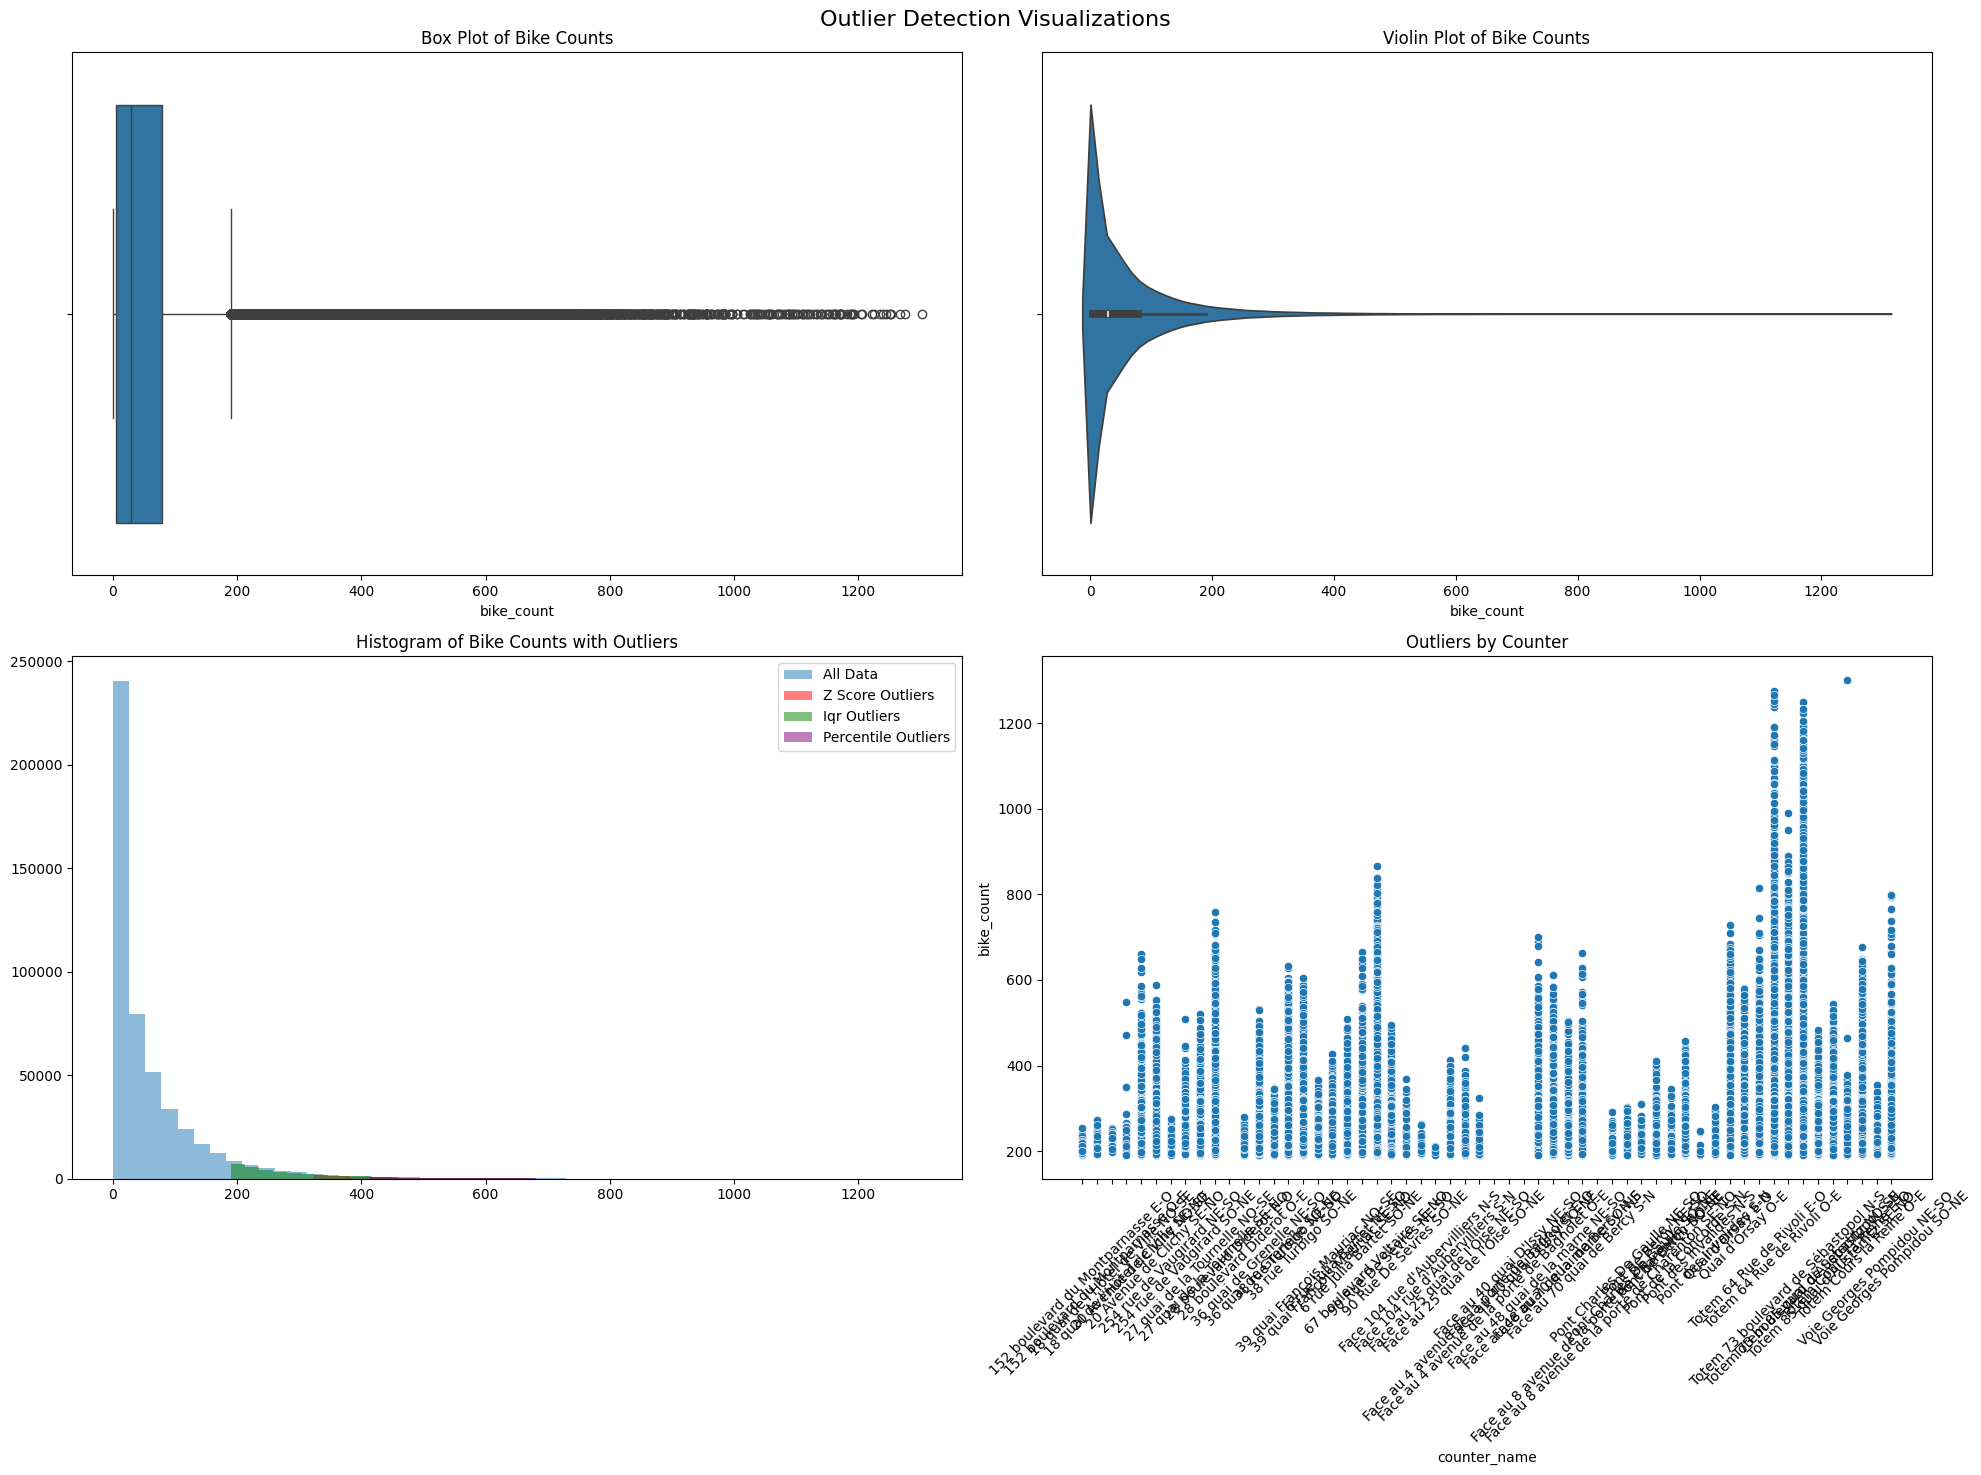

In [4]:
main (data)

Daily Bicycle Count Summary:
                                                bike_count        
                                                      mean max min
counter_name                                                      
152 boulevard du Montparnasse E-O                      NaN NaN NaN
152 boulevard du Montparnasse O-E                      NaN NaN NaN
18 quai de l'Hôtel de Ville NO-SE                      NaN NaN NaN
18 quai de l'Hôtel de Ville SE-NO                      NaN NaN NaN
20 Avenue de Clichy NO-SE                              NaN NaN NaN
20 Avenue de Clichy SE-NO                              NaN NaN NaN
254 rue de Vaugirard NE-SO                             NaN NaN NaN
254 rue de Vaugirard SO-NE                             NaN NaN NaN
27 quai de la Tournelle NO-SE                          NaN NaN NaN
27 quai de la Tournelle SE-NO                          NaN NaN NaN
28 boulevard Diderot E-O                               NaN NaN NaN
28 boulevard Diderot O-E         

C:\Users\emman\AppData\Local\Temp\ipykernel_1700\565511366.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_counts = week_data.groupby(['date', 'counter_name'])['bike_count'].sum().reset_index()
C:\Users\emman\AppData\Local\Temp\ipykernel_1700\565511366.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Counter', bbox_to_anchor=(1.05, 1), loc='upper left')
C:\Users\emman\AppData\Local\Temp\ipykernel_1700\565511366.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

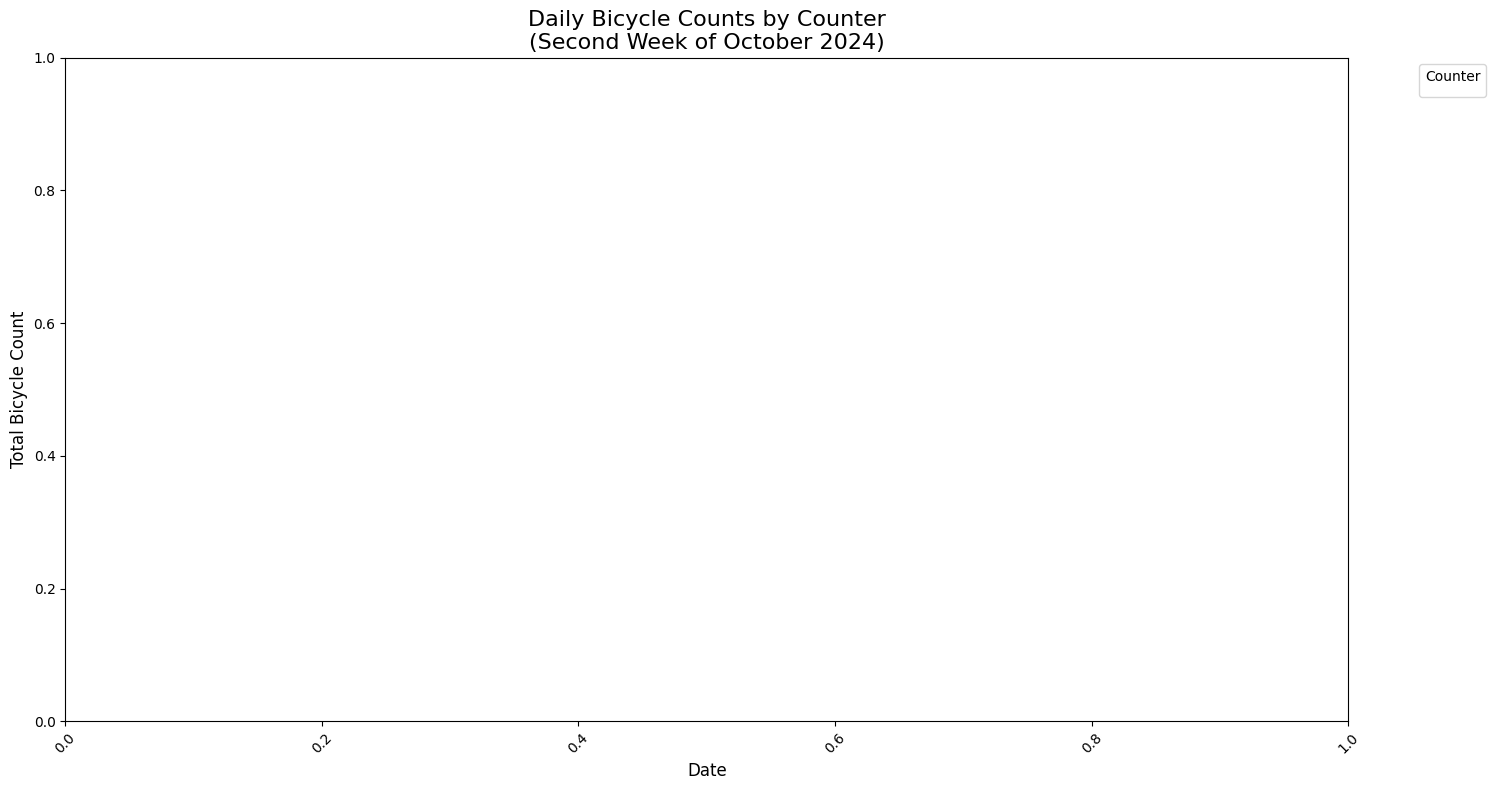

C:\Users\emman\AppData\Local\Temp\ipykernel_1700\565511366.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_counts = week_data.groupby(['date', 'counter_name'])['bike_count'].sum().reset_index()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1500x800 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_daily_bike_counts(df, start_date='2024-10-08', end_date='2024-10-14'):
    """
    Visualize daily bicycle counts for each counter in the specified date range.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    start_date (str): Start date of the week to analyze (default: second week of October 2024)
    end_date (str): End date of the week to analyze (default: second week of October 2024)
    
    Returns:
    matplotlib.figure.Figure: The created visualization
    """
    # Convert date column to datetime if not already
    df['date'] = pd.to_datetime(df['date'])
    
    # Filter data for the specified date range
    week_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Group by date and counter, sum bike counts
    daily_counts = week_data.groupby(['date', 'counter_name'])['bike_count'].sum().reset_index()
    
    # Get unique counters
    counters = daily_counts['counter_name'].unique()
    
    # Create the visualization
    plt.figure(figsize=(15, 8))
    
    # Create a line plot for each counter
    for counter in counters:
        counter_data = daily_counts[daily_counts['counter_name'] == counter]
        plt.plot(counter_data['date'], counter_data['bike_count'], 
                 label=counter, marker='o')
    
    plt.title('Daily Bicycle Counts by Counter\n(Second Week of October 2024)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Bicycle Count', fontsize=12)
    plt.legend(title='Counter', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Additional analysis
    print("Daily Bicycle Count Summary:")
    summary = daily_counts.groupby('counter_name').agg({
        'bike_count': ['mean', 'max', 'min']
    })
    print(summary)
    
    return plt

def create_heatmap_visualization(df, start_date='2024-10-08', end_date='2024-10-14'):
    """
    Create a heatmap visualization of bicycle counts by counter and date.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    start_date (str): Start date of the week to analyze
    end_date (str): End date of the week to analyze
    
    Returns:
    matplotlib.figure.Figure: The created heatmap visualization
    """
    # Convert date column to datetime if not already
    df['date'] = pd.to_datetime(df['date'])
    
    # Filter data for the specified date range
    week_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Group by date and counter, sum bike counts
    daily_counts = week_data.groupby(['date', 'counter_name'])['bike_count'].sum().reset_index()
    
    # Pivot the data for heatmap
    heatmap_data = daily_counts.pivot(index='counter_name', columns='date', values='bike_count')
    
    # Create the heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f', cbar_kws={'label': 'Bicycle Count'})
    
    plt.title('Daily Bicycle Counts Heatmap\n(Second Week of October 2024)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Counter', fontsize=12)
    plt.tight_layout()
    
    return plt

def main(df):
    """
    Main function to generate visualizations.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    """
    # Line plot visualization
    line_plot = visualize_daily_bike_counts(df)
    line_plot.show()
    
    # Heatmap visualization
    heatmap_plot = create_heatmap_visualization(df)
    heatmap_plot.show()

# Example usage (commented out - replace with your actual data loading)
# df = pd.read_csv('your_bike_count_data.csv')
main(data)

## Linear model

Let's now construct our first linear model with [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). We use a few helper functions defined in `utils.py` of the starting kit to load the train set.

In [3]:
import utils

X, y = utils.get_train_data()
X.head(2)

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
400125,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233
408305,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233


and

In [4]:
y

array([1.60943791, 1.38629436, 0.        , ..., 3.49650756, 2.30258509,
       2.07944154])

Where `y` contains the `log_bike_count` variable. 

To test our baseline estimator, we create a validations set from the training set. Note that, during modeling and exploring the data, we always recommend using cross validation rather than a single train / validation split to evaluate your first results, because this will bring more stability and generalization.

We create the validation set by simply slicing the last 30 days of the training set:

In [5]:
def train_test_split_temporal(X, y, delta_threshold="30 days"):
    
    cutoff_date = X["date"].max() - pd.Timedelta(delta_threshold)
    mask = (X["date"] <= cutoff_date)
    X_train, X_valid = X.loc[mask], X.loc[~mask]
    y_train, y_valid = y[mask], y[~mask]

    return X_train, y_train, X_valid, y_valid

In [6]:
X_train, y_train, X_valid, y_valid = train_test_split_temporal(X, y)

print(
    f'Train: n_samples={X_train.shape[0]},  {X_train["date"].min()} to {X_train["date"].max()}'
)
print(
    f'Valid: n_samples={X_valid.shape[0]},  {X_valid["date"].min()} to {X_valid["date"].max()}'
)

Train: n_samples=456507,  2020-09-01 01:00:00 to 2021-08-10 23:00:00
Valid: n_samples=40320,  2021-08-11 00:00:00 to 2021-09-09 23:00:00


In [13]:
_encode_dates(X_train[["date"]]).columns.tolist()

['year', 'month', 'day', 'weekday', 'hour']

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[["date"]]).columns.tolist()

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline(date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x000002C80690E9E0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('ridge', Ridge())])

We then evaluate this model with the RMSE metric,

In [15]:
from sklearn.metrics import mean_squared_error

print(
    f"Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train), squared=False):.2f}"
)
print(
    f"Valid set, RMSE={mean_squared_error(y_valid, pipe.predict(X_valid), squared=False):.2f}"
)

Train set, RMSE=0.80
Valid set, RMSE=0.73


c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
pipe.named_steps['ridge'].coef_

array([ 3.03667583e-02, -3.03667583e-02, -3.53558100e-01, -3.49425432e-01,
       -1.95812152e-02, -8.18946153e-02, -2.43373528e-02,  3.64198760e-01,
        3.35772306e-01,  9.84588905e-02,  5.74008780e-01,  1.07997247e-01,
       -2.64646987e-01, -3.86992282e-01, -1.87333999e-03,  4.06294645e-02,
        3.50732473e-02,  3.32824993e-02, -7.00465999e-03,  4.29787204e-03,
        2.33118138e-02,  7.92288725e-02,  8.88410021e-02, -2.45796369e-03,
       -2.80182791e-02,  3.66070805e-02, -5.56203054e-02, -5.79535620e-02,
       -2.72818424e-02, -6.51393290e-03,  9.51084853e-03,  6.29609833e-02,
        2.67268206e-02,  5.79509218e-02,  4.67249389e-02, -4.05214105e-03,
        1.84594467e-02, -5.77681198e-02, -1.09273061e-01, -2.81888843e-02,
       -1.04407777e-01,  4.33592884e-02,  3.20662950e-02, -6.67071898e-03,
       -1.41946807e-01, -2.36111750e-02,  7.98495565e-02,  1.12758290e-01,
        1.45539526e-01,  9.86446030e-02, -1.11450712e-01, -3.01730089e-01,
       -1.93689385e+00, -

Feature Importance 

In [35]:
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
my_array = pd.DataFrame(feature_names)
type(my_array)

pandas.core.frame.DataFrame

In [32]:
np.shape(pipe.named_steps['ridge'].coef_)

(162,)

In [36]:
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
coefs = pipe.named_steps['ridge'].coef_

df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
print(df)

                                             Feature  Coefficient
0                                    date__year_2020     0.030367
1                                    date__year_2021    -0.030367
2                                      date__month_1    -0.353558
3                                      date__month_2    -0.349425
4                                      date__month_3    -0.019581
..                                               ...          ...
157            cat__site_name_Totem 64 Rue de Rivoli     0.657969
158  cat__site_name_Totem 73 boulevard de Sébastopol     0.948256
159        cat__site_name_Totem 85 quai d'Austerlitz     0.283992
160              cat__site_name_Totem Cours la Reine     0.183583
161             cat__site_name_Voie Georges Pompidou    -0.081067

[162 rows x 2 columns]


In [40]:
df = df.sort_values(by='Coefficient', ascending=False)
df.head(50)

,Feature,Coefficient
68,date__hour_16,1.518513
69,date__hour_17,1.391398
67,date__hour_15,1.284865
59,date__hour_7,1.093806
66,date__hour_14,1.053657
70,date__hour_18,0.966098
63,date__hour_11,0.952707
158,cat__site_name_Totem 73 boulevard de Sébastopol,0.948256
65,date__hour_13,0.944348
64,date__hour_12,0.933447


The model doesn't have enough capacity to generalize on the train set, since we have lots of data with relatively few parameters. However it happened to work somewhat better on the test set. We can compare these results with the baseline predicting the mean value,

In [ ]:
import statsmodels.api as sm

# assume X is the design matrix and y is the response variable
X = ...  # design matrix
y = ...  # response variable

# fit the Ridge model
ridge_model = Ridge()
ridge_model.fit(X, y)

# compute VIF for each feature
vif_values = []
for i in range(X.shape[1]):
    X_i = X[:, i]
    X_not_i = np.delete(X, i, axis=1)
    X_not_i = sm.add_constant(X_not_i)
    model = sm.OLS(X_i, X_not_i).fit()
    r2 = model.rsquared
    vif = 1 / (1 - r2)
    vif_values.append(vif)

print(vif_values)

In [ ]:
from sklearn.decomposition import PCA

# assume X is the design matrix and y is the response variable
X = ...  # design matrix
y = ...  # response variable

# apply PCA to the data
pca = PCA(n_components=0.95)  # retain 95% of the explained variance
X_pca = pca.fit_transform(X)

# train and test the Ridge model on the PCA-transformed data
ridge_model = Ridge()
ridge_model.fit(X_pca, y)
y_pred = ridge_model.predict(X_pca)

In [24]:
print("Baseline mean prediction.")
print(
    f"Train set, RMSE={mean_squared_error(y_train, np.full(y_train.shape, y_train.mean()), squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_valid, np.full(y_valid.shape, y_valid.mean()), squared=False):.2f}"
)

Baseline mean prediction.
Train set, RMSE=1.67
Test set, RMSE=1.44


which illustrates that we are performing better than the baseline.

Let's visualize the predictions for one of the stations (we transform the logarithmic bike counts back to their original unit):

In [25]:
mask = (
    (X_valid["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")
    & (X_valid["date"] > pd.to_datetime("2021/09/01"))
    & (X_valid["date"] < pd.to_datetime("2021/09/08"))
)

df_viz = X_valid.loc[mask].copy()
df_viz["bike_count"] = np.exp(y_valid[mask.values]) - 1
df_viz["bike_count (predicted)"] = np.exp(pipe.predict(X_valid[mask])) - 1

Text(0, 0.5, 'bike_count')

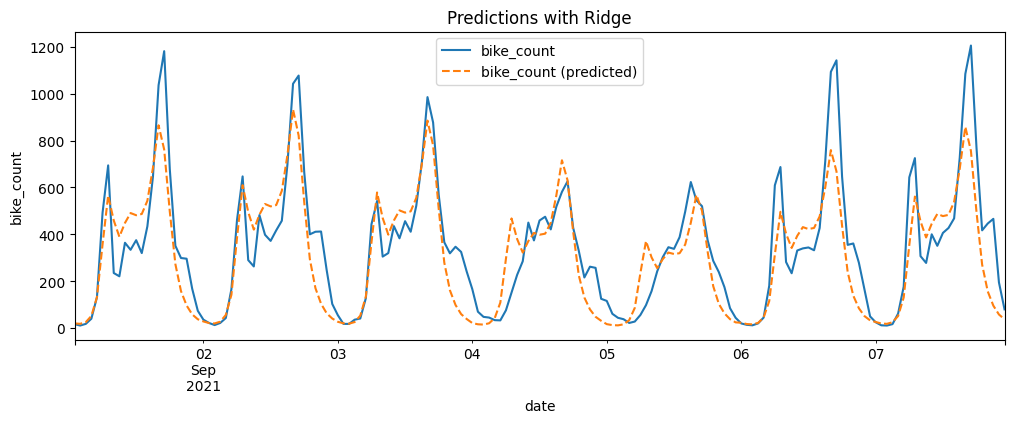

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x="date", y="bike_count", ax=ax)
df_viz.plot(x="date", y="bike_count (predicted)", ax=ax, ls="--")
ax.set_title("Predictions with Ridge")
ax.set_ylabel("bike_count")

So we start to see the daily trend, and some of the week day differences are accounted for, however we still miss the details and the spikes in the evening are under-estimated.

A useful way to visualize the error is to plot `y_pred` as a function of `y_true`,

<Axes: xlabel='y_true', ylabel='y_pred'>

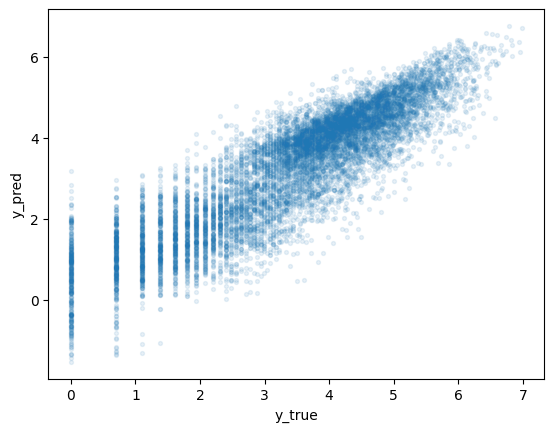

In [27]:
fig, ax = plt.subplots()

df_viz = pd.DataFrame({"y_true": y_valid, "y_pred": pipe.predict(X_valid)}).sample(
    10000, random_state=0
)

df_viz.plot.scatter(x="y_true", y="y_pred", s=8, alpha=0.1, ax=ax)

It is recommended to use cross-validation for hyper-parameter tuning with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or more reliable model evaluation with [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). In this case, because we want the test data to always be in the future as compared to the train data, we can use [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html):

<img src="https://i.stack.imgur.com/Q37Bn.png" />

The disadvantage, is that we can either have the training set size be different for each fold which is not ideal for hyper-parameter tuning (current figure), or have constant sized small training set which is also not ideal given the data periodicity. This explains that generally we will have worse cross-validation scores than test scores:

In [28]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

cv = TimeSeriesSplit(n_splits=6)

# When using a scorer in scikit-learn it always needs to be better when smaller, hence the minus sign.
scores = cross_val_score(
    pipe, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error"
)
print("RMSE: ", scores)
print(f"RMSE (all folds): {-scores.mean():.3} ± {(-scores).std():.3}")

RMSE:  [-0.96370992 -0.87155645 -0.85104595 -0.87402962 -1.0638737  -0.96757066]
RMSE (all folds): 0.932 ± 0.0744
